In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


In [ ]:
plt.imshow(X_train[2], cmap = 'gray')

In [181]:
# flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")

Shapes - Train: (60000, 784), Test: (10000, 784)


In [182]:
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_test_flattened.max(), 3)
#print the new values
print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())

Minimum pixel value = 0.0
Maximum pixel value = 1.0


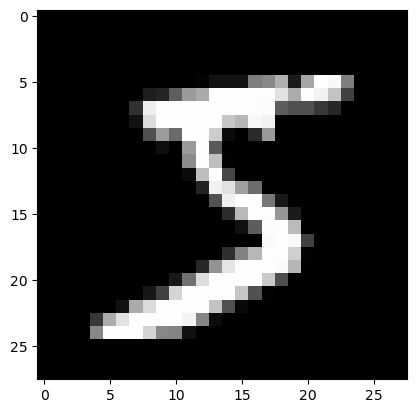

In [183]:
plt.imshow(X_normalized_train[0].reshape(28, 28), cmap = 'gray')
plt.show()

In [184]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoidPrime(z):
    sigmoid_val = sigmoid(z)
    return sigmoid_val * (1 - sigmoid_val)

def softmax(z):
    exp = np.exp(z)
    return exp / np.sum(exp)

def crossEntropyLoss(y, y_hat):
    return -np.sum(y * np.log(y_hat))

def oneHotEncode(label):
    num_classes = 10
    y = np.zeros(10)
    for i in range(10):
        if (label == i):
            y[i] = 1
    return y

Our Model will have 1 hidden layer (in addition to an input layer and an output layer.

Let $x$ be the input to the mode.

Following are the equations of forward pass:

$z^1 = W^1 x + b^1$ <br>
$a^1 = \Phi_1(z^1)$ <br>


$z^2 = W^2 a^1 + b^2$ <br>
$a^2 = \Phi_2(z^2)$ <br>

Note that $a^2$ is equal to y_hat, which denotes the final probablity vector

In [185]:
def forward(x, W1, b1, W2, b2):
    z1 = np.matmul(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(W2, a1) + b2
    a2 = softmax(z2)
    return z1, z2, a1, a2

In [186]:
def backward(x_input, W1, W2, b1, b2, z1, z2, a1, a2, y):
    # Output: dW1, dW2, db1, db2
    y_hat = a2 # for my ease
    dW2 = (y_hat - y) @ np.transpose(a1)
    dZ2 = y_hat - y
    db2 = y_hat - y
    dZ1 = np.zeros_like(z1)
    for i in range(100):
        sum = 0
        for m in range(10):
            sum += dZ2[m] * W2[m][i] * sigmoidPrime(z1[i])
            # print(sum)
        dZ1[i] = sum
    # print(dZ1.shape)
    # print(x_input.shape)
    dW1 = dZ1 @ np.transpose(x_input)
    db1 = np.sum(dZ2, axis=0, keepdims=True)
    return dW1, dW2, db1, db2

In [245]:
def predict(x, W1, b1, W2, b2):
    y_hat = forward(x, W1, b1, W2, b2)[-1]
    return np.argmax(y_hat)

In [265]:
def train(X, Y, lr):
    w1 = np.random.randn(100, 784)
    w2 = np.random.randn(10, 100)
    b1 = np.random.randn(100).reshape(-1, 1)
    b2 = np.random.randn(10).reshape(-1, 1)
    nums_right_predicts = 0
    a = True
    
    for idx in range(len(X)):
        x = X[idx].reshape(-1, 1)  # Reshape input to column vector
        y = oneHotEncode(Y[idx]).reshape(-1, 1)  # One-hot encode label
        
        # Forward and Backward passes
        z1, z2, a1, a2 = forward(x, w1, b1, w2, b2)
        dW1, dW2, db1, db2 = backward(x, w1, w2, b1, b2, z1, z2, a1, a2, y)
        
        # Update parameters using gradients
        w1 = w1 - lr * dW1
        w2 = w2 - lr * dW2
        b1 = b1 - lr * db1
        b2 = b2 - lr * db2
        
        # Check predictions for accuracy
        y_pred = predict(x, w1, b1, w2, b2)
        if y_pred == Y[idx]:  # Compare predicted class with true label
            nums_right_predicts += 1
            if (a):
                plt.imshow(x.reshape(28, 28))
                plt.show()
                print(y_pred)
                a = False
        
        # Print accuracy every 1000 iterations
        if (idx % 1000 == 0 and idx != 0):
            print(f"Iteration: {idx}")
            print(f"Accuracy over last 1000 samples: {(nums_right_predicts / 1000) * 100:.2f}%")
            nums_right_predicts = 0  # Reset counter
    
    return w1, w2, b1, b2

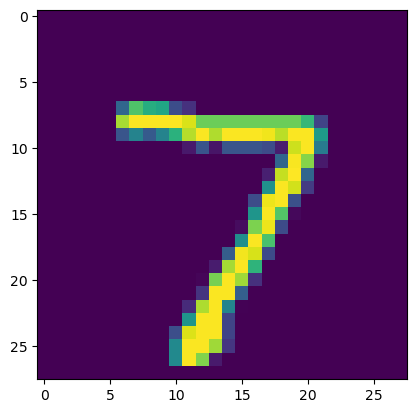

7
Iteration: 1000
Accuracy over last 1000 samples: 97.30%
Iteration: 2000
Accuracy over last 1000 samples: 98.00%
Iteration: 3000
Accuracy over last 1000 samples: 98.60%
Iteration: 4000
Accuracy over last 1000 samples: 99.10%
Iteration: 5000
Accuracy over last 1000 samples: 99.10%
Iteration: 6000
Accuracy over last 1000 samples: 99.50%
Iteration: 7000
Accuracy over last 1000 samples: 99.40%
Iteration: 8000
Accuracy over last 1000 samples: 99.90%
Iteration: 9000
Accuracy over last 1000 samples: 99.90%


In [267]:
W1, W2, b1, b2 = train(X_normalized_test, Y_test, 0.1)

The number is: 8


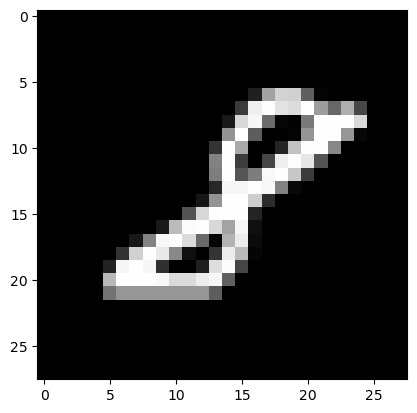

In [298]:
x = X_normalized_train[1009].reshape(-1, 1)
y_pred = predict(x, W1, b1, W2, b2)
plt.imshow(x.reshape(28, 28), cmap = 'gray')
print(f"The number is: {y_pred}")
plt.show()